In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
file = "results-xgb-nadja.json"

with open(file) as f:
    data = json.load(f)
print(len(data1))

20


In [8]:
# create an empty list to store dataframes
dfs1 = []

# iterate through each entry in the json data
for entry in data:
    # extract relevant information and results
    model_info = entry['model_info']
    results_unstratified = entry['unstratified_results']
    results_stratified = entry['stratified_results']

    # create a dataframe with the desired columns
    df_entry = pd.DataFrame({
        'model': [model_info['model']],
        'transformation': [model_info['transformation']],
        'n_train': [model_info['n_train']],
        'n_features': [model_info['n_features']],
        'n_groups': [model_info['n_groups']],
        'n_folds': [model_info['n_folds']],
        'n_iter': [model_info['n_iter']],
        'noise': [model_info['FD_noise']],
        'scoring': [model_info['scoring']],
        'seed': [entry['seed']],
        'random_state': [entry['random_state']],
        'hyperparameters_same': [entry['hyperparameters_same:']],
        'train_r2_unstratified': [results_unstratified['train r2']],
        'test_r2_unstratified': [results_unstratified['test r2']],
        'train_mse_unstratified': [results_unstratified['train mse']],
        'test_mse_unstratified': [results_unstratified['test mse']],
        'train_mae_unstratified': [results_unstratified['train mae']],
        'test_mae_unstratified': [results_unstratified['test mae']],
        'train_r2_stratified': [results_stratified['train r2']],
        'test_r2_stratified': [results_stratified['test r2']],
        'train_mse_stratified': [results_stratified['train mse']],
        'test_mse_stratified': [results_stratified['test mse']],
        'train_mae_stratified': [results_stratified['train mae']],
        'test_mae_stratified': [results_stratified['test mae']],
    })

    # append the dataframe to the list
    dfs1.append(df_entry)

# concatenate all dataframes in the list into a single dataframe
data = pd.concat(dfs1, ignore_index=True)

# display the resulting dataframe
print(data)
print(data.shape)


           model transformation  n_train  n_features  n_groups  n_folds  \
0   XGBRegressor       identity     1000          10        10        5   
1   XGBRegressor       identity     1000          10        10        5   
2   XGBRegressor       identity     1000          10        10        5   
3   XGBRegressor       identity     1000          10        10        5   
4   XGBRegressor       identity     1000          10        10        5   
5   XGBRegressor       identity     1000          10        10        5   
6   XGBRegressor       identity     1000          10        10        5   
7   XGBRegressor       identity     1000          10        10        5   
8   XGBRegressor       identity     1000          10        10        5   
9   XGBRegressor       identity     1000          10        10        5   
10  XGBRegressor       identity     1000          10        10        5   
11  XGBRegressor       identity     1000          10        10        5   
12  XGBRegressor       id

In [9]:
# are there any duplicates in data
print(data.duplicated().sum())

0


In [10]:
data.groupby([data['hyperparameters_same']]).count()

,model,transformation,n_train,n_features,n_groups,n_folds,n_iter,noise,scoring,seed,...,train_mse_unstratified,test_mse_unstratified,train_mae_unstratified,test_mae_unstratified,train_r2_stratified,test_r2_stratified,train_mse_stratified,test_mse_stratified,train_mae_stratified,test_mae_stratified
hyperparameters_same,,,,,,,,,,,,,,,,,,,,,
False,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [11]:
# percentage of hyperparameters_same = False
print(100*data.groupby([data['hyperparameters_same']]).count()['model']/data.shape[0])


hyperparameters_same
False    100.0
Name: model, dtype: float64


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data200, data1000, metric='r2', order=None):
    if order is None:
        order = [
            f'test_{metric}_unstratified', 
            f'test_{metric}_stratified'
        ]

    df_melted200 = pd.melt(data200, value_vars=order, var_name='Metric', value_name='Value')
    df_melted1000 = pd.melt(data1000, value_vars=order, var_name='Metric', value_name='Value')

    fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=False)

    for i in range(2):
        if i == 0:
            df_melted = df_melted200
            df=data200
            n_samples=200
        else:
            df_melted = df_melted1000    
            df=data1000
            n_samples=1000
        ax = sns.boxplot(x='Metric', y='Value', data=df_melted, ax=axes[i],
                         order=order,
                         showmeans=True,
                         meanline=True,
                         color="grey",
                         meanprops={"marker": "+",
                                    "markerfacecolor": "white",
                                    "markeredgecolor": "green",
                                    "markersize": "10"},
                         width=.5,
                         #linecolor="#137", linewidth=.75,
                    
                         medianprops={"color": "#137", "linewidth": 1})
        ax.set_ylabel(metric.upper())
        ax.set_xlabel('')
        plt.text(0.98, 0.98, f'N = {len(df)}', horizontalalignment='right', verticalalignment='top',
                 transform=ax.transAxes, size=14)
        xtickNames = plt.setp(ax, xticklabels=['Test Unstratified', 'Test Stratified'])
        plt.setp(xtickNames, rotation=0)
        ax.set_title(f'{n_samples} train samples')

    plt.show()

/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nadja/miniconda3/envs/slds_env310/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

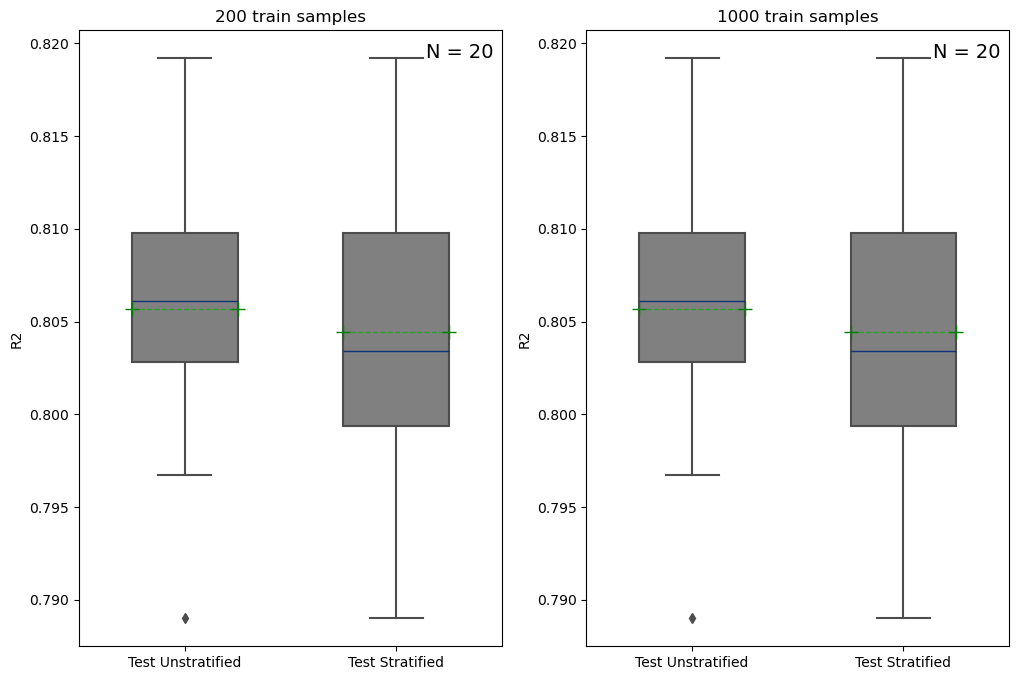

In [14]:
plot_boxplots(data, data, metric='r2')